# Яндекс Музыка

## Обзор данных

Первое представление о данных Яндекс Музыки.

**Задание 1**

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

**Задание 2**

In [2]:
# Достаем данные из файла и записываем в таблицу
df = pd.read_csv('yandex_music_project.csv')

**Задание 3**

In [3]:
# Получаем первые 10 строк таблицы df
display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


**Задание 4**

In [4]:
# Получаем общую информацию о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


Количество ненулевых значений в столбцах различается. Значит, в данных есть пропущенные значения.

**Задание 5**

In [5]:
# Всего строк 65079, встречаются столбцы, в которых 63848, 63881 или 57876 заполненных значений.

**Выводы**

В каждой строке таблицы — данные о прослушанном треке. Часть колонок описывает саму композицию: название, исполнителя и жанр. Остальные данные рассказывают о пользователе: из какого он города, когда он слушал музыку.

Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Переименование столбцов

**Задание 6**

In [6]:
# Проверим наименования колонок
df.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

**Задание 7**

In [7]:
# Приведем наименование колонок в порядок
df = df.rename(columns= {'  userID':'user_id', 'Track':'track', '  City  ':'city', 'Day':'day'})

**Задание 8**

In [8]:
# Проверим результат переименования колонок
df.columns

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

### Обработка пропущенных значений

**Задание 9**

In [9]:
# Подсчитаем пропуски данных
df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

<Axes: >

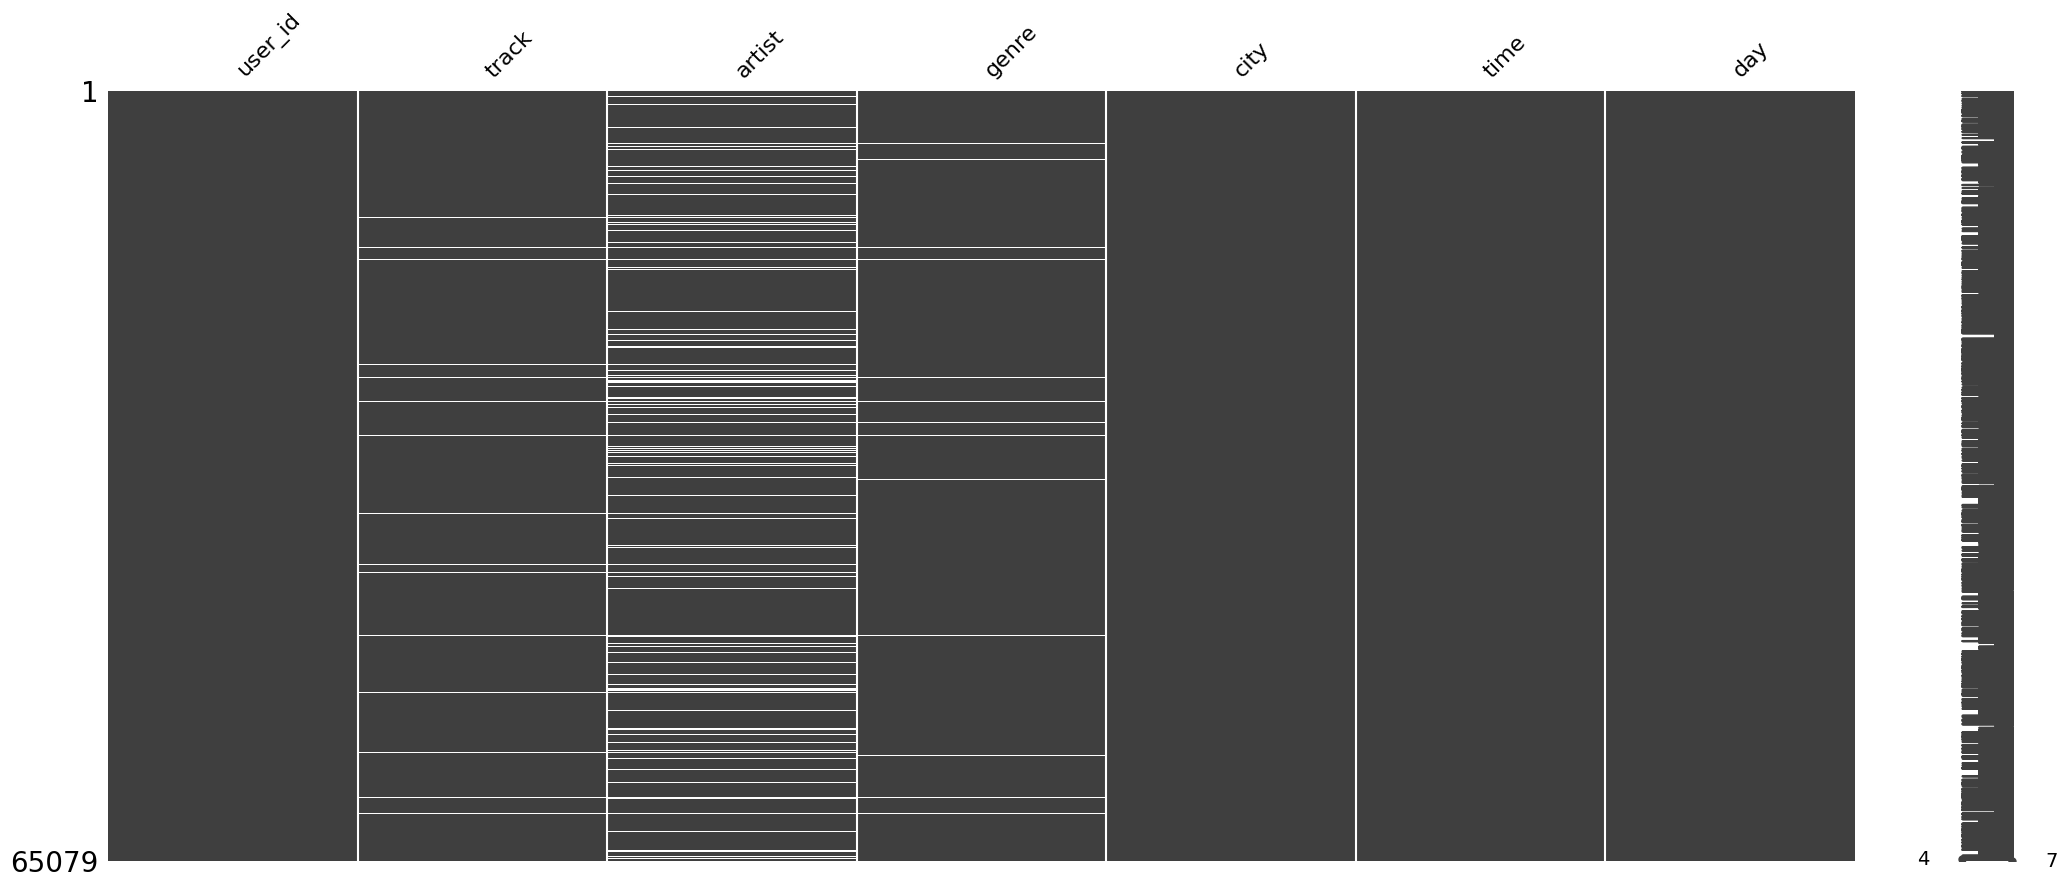

In [10]:
# Выведем визуализацию пропуска данных (белые строки - пропущенные данные)
msno.matrix(df)

**Задание 10**

In [11]:
# замена пропущенных значений на 'unknown'
df['track'] = df['track'].fillna('unknown') # замена пустого значения на unknown
df['artist'] = df['artist'].fillna('unknown') # замена пустого значения на unknown
df = df.dropna(subset= 'genre') # удаление строк с пустым значением, 
# т.к. значения в этом столбике важны для исследования и их отсутствие искажает анализ, т.о. корректнее вообще удалить такую строку

<Axes: >

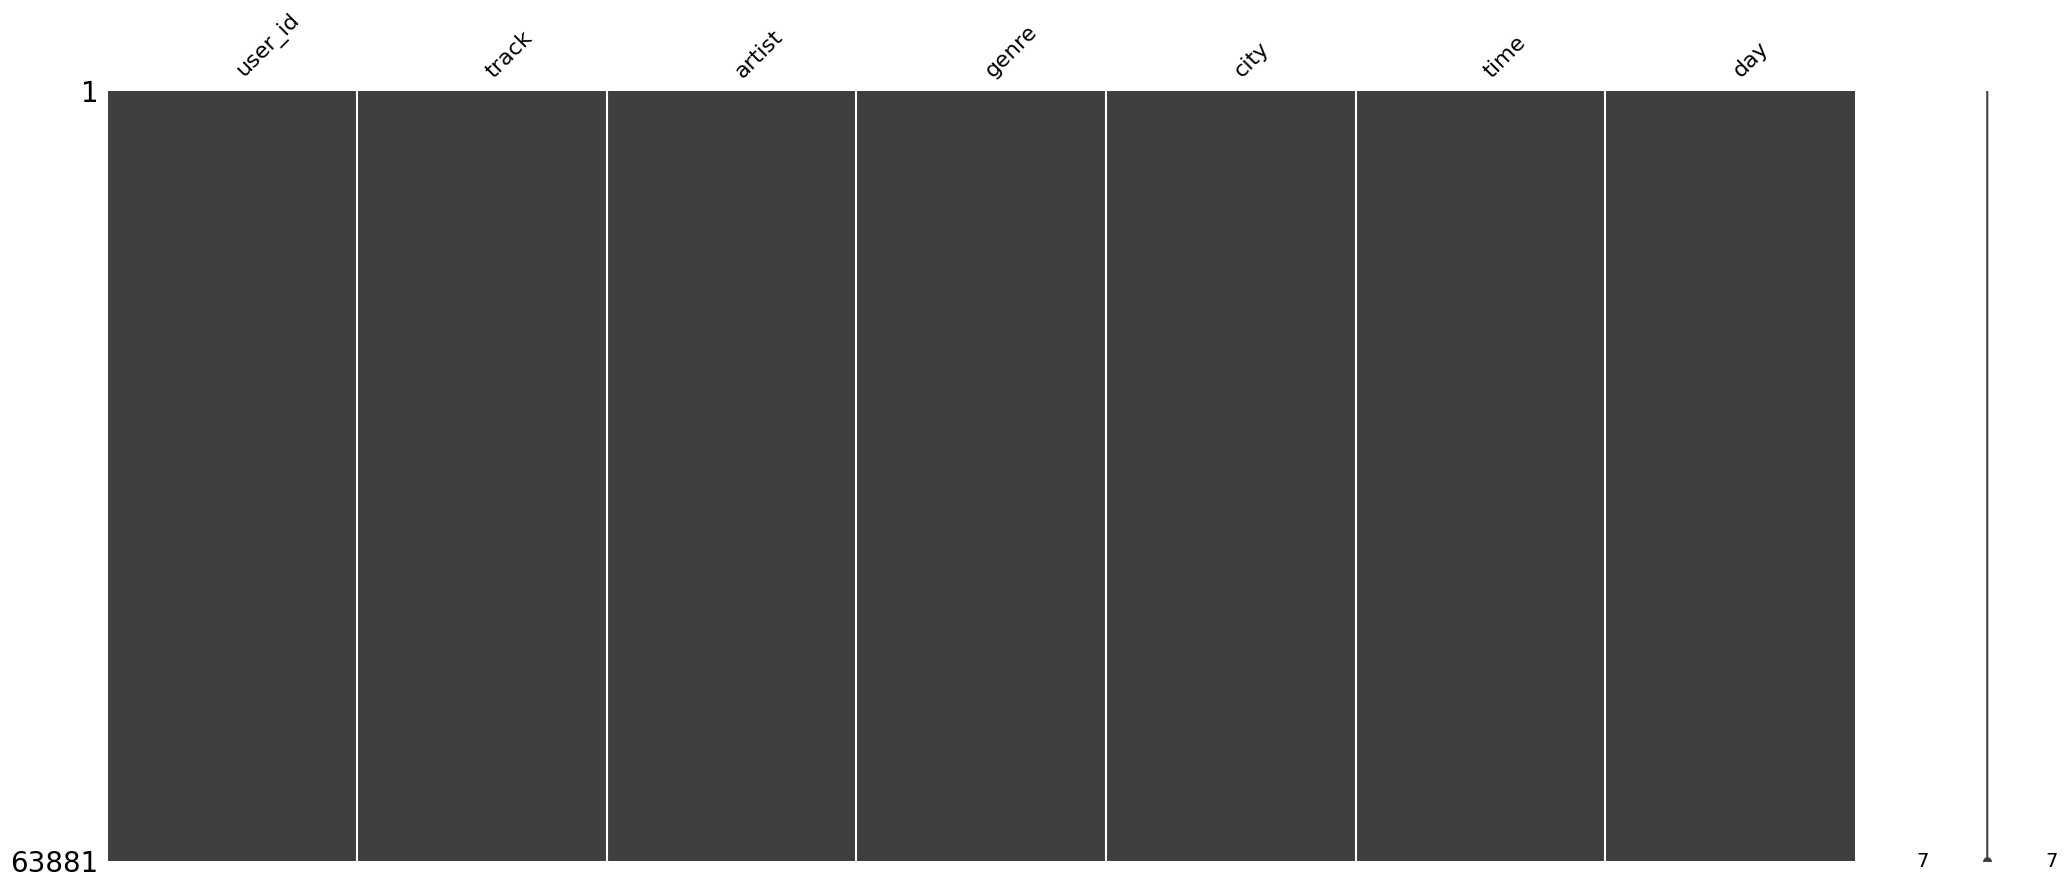

In [12]:
# Проводим повторную проверку на пустые значения. 
msno.matrix(df)

**Задание 11**

In [13]:
# Проводим повторную проверку на пустые значения.
df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Обработка дубликатов

**Задание 12**

In [14]:
# Производим подсчёт явных дубликатов
df.duplicated().sum()

3755

**Задание 13**

In [15]:
# Удаляем явные дубликаты, создаем новые индексы и удаляем старые
df = df.drop_duplicates().reset_index(drop=True)

**Задание 14**

In [16]:
# Повторно проверяем на отсутствие явных дубликатов
df.duplicated().sum()

0

**Задание 15**

In [17]:
# В целях выявления неявных дубликатов в "ключевом столбце" просмотрим уникальные отсортированные названия жанров
df_genre = df['genre']
df_genre_sort = df_genre.sort_values()
print(df_genre_sort.unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

**Задание 16**

In [18]:
# Устраняем неявные дубликаты, поместив их в список подлежащих замене значений
duplicate_hip = ['hip', 'hop', 'hip-hop']
hip = 'hiphop'
df['genre'] = df['genre'].replace(duplicate_hip, hip)
df['genre'] = df['genre'].replace('электроника', 'electronic')

**Задание 17**

In [19]:
# Повторно проверяем на отсутствие неявных дубликатов
print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

**Выводы**

Предобработка обнаружила три проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты — явные и неявные.

Мы исправили заголовки, чтобы упростить работу с таблицей. 
Удалили дубликаты, без них исследование станет более точным.
Пропущенные значения заменили на `'unknown'`.

### Сравнение поведения пользователей двух столиц

**Задание 18**



In [20]:
# Подсчитаем прослушивания в каждом городе
df_group = df.groupby('city') ['city'].count()
print(df_group)

city
Moscow              41892
Saint-Petersburg    18234
Name: city, dtype: int64


<Axes: ylabel='city'>

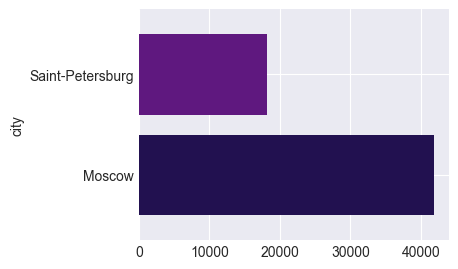

In [21]:
# Выведем визуализацию результатов подсчета прослушивания музыки в двух городах
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize= (4, 3))
colors = sns.color_palette('magma') # задаем цветовую палитру, чтобы использовать в диаграмме
df_group.plot.barh(color= colors, width=0.8)

**Задание 19**


In [22]:
# Подсчитаем прослушивания в каждый из трёх дней
df_group = df.groupby('day') ['day'].count()
display(df_group)

day
Friday       21482
Monday       20866
Wednesday    17778
Name: day, dtype: int64

<Axes: ylabel='day'>

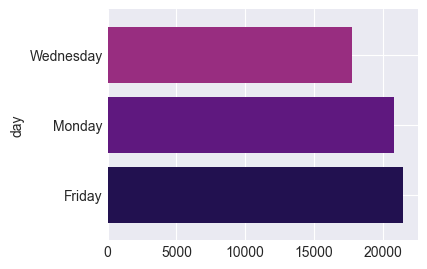

In [23]:
# Выведем визуализацию результатов подсчета прослушивания музыки по дням недели
colors = sns.color_palette('magma') # задаем цветовую палитру, чтобы использовать в диаграмме
plt.figure(figsize= (4, 3))
df_group.plot.barh(color= colors, width=0.8)

**Задание 20**

In [24]:
# Создаем функцию-фильтр для подсчета прослушиваний в зависимости от города и дня недели
def number_tracks(day, city):
    track_list = df[df['day'] == day]   # выбираем строки df со значением переменной day в столбце day
    track_list = track_list[track_list['city'] == city] # выбираем строки уже в track_list со значением переменной city в столбце city
    track_list_count = track_list['user_id'].count() # считаем количество строк в track_list по столбцу user_id (можно по любому столбцу)
    return track_list_count # возвращаем значение track_list_count из функции

**Задание 21**

In [25]:
# количество прослушиваний в Москве по понедельникам
number_tracks('Monday', 'Moscow')

15347

In [26]:
# количество прослушиваний в Санкт-Петербурге по понедельникам
number_tracks('Monday', 'Saint-Petersburg')

5519

In [27]:
# количество прослушиваний в Москве по средам
number_tracks('Wednesday', 'Moscow')

10865

In [28]:
# количество прослушиваний в Санкт-Петербурге по средам
number_tracks('Wednesday', 'Saint-Petersburg')

6913

In [29]:
# количество прослушиваний в Москве по пятницам
number_tracks('Friday', 'Moscow')

15680

In [30]:
# количество прослушиваний в Санкт-Петербурге по пятницам
number_tracks('Friday', 'Saint-Petersburg')

5802

**Задание 22**

In [31]:
# Создаем таблицу с результатами
data = [
    ['Moscow', 15347, 10865, 15680],
    ['Saint-Petersburg', 5519, 6913, 5802]
]
col = ['city', 'monday', 'wednesday', 'friday']
info_city = pd.DataFrame(data= data, columns= col)

# Выводим таблицу на экран
display(info_city)

,city,monday,wednesday,friday
0,Moscow,15347,10865,15680
1,Saint-Petersburg,5519,6913,5802


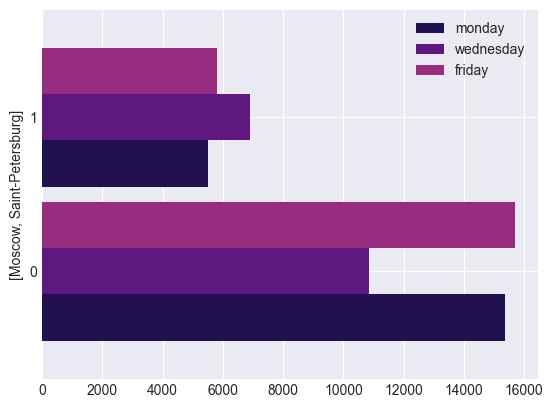

In [32]:
# Выведем визуализацию результатов подсчета прослушивания музыки по дням недели
colors = sns.color_palette('magma') # задаем цветовую палитру, чтобы использовать в диаграмме
labels = ['Moscow', 'Saint-Petersburg']
info_city.plot.barh(ylabel= labels, color= colors, width=0.9)
plt.show()

**Выводы**

Данные показывают разницу поведения пользователей:

- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

### Музыка в начале и в конце недели

**Задание 23**

In [33]:
# Получаем таблицу moscow_general из тех строк таблицы df, для которых значение в столбце 'city' равно 'Moscow'
moscow_general = df[df['city'] == 'Moscow']

In [34]:
# Получаем таблицу spb_general из тех строк таблицы df, для которых значение в столбце 'city' равно 'Saint-Petersburg'
spb_general = df[df['city'] == 'Saint-Petersburg']

**Задание 24**

In [36]:
# Создаем функцию-фильтр для подсчета прослушиваний по городам в определенное время дня
def genre_weekday(df, day, time1, time2):
    # последовательная фильтрация
    # оставляем в genre_df только те строки df, у которых день равен day
    genre_df = df[df['day'] == day]
    # оставляем в genre_df только те строки genre_df, у которых время меньше time2
    genre_df = genre_df[genre_df['time'] < time2]
    # оставляем в genre_df только те строки genre_df, у которых время больше time1
    genre_df = genre_df[genre_df['time'] > time1]
    # сгруппируем отфильтрованный датафрейм по столбцу с названиями жанров, возьмём столбец genre и посчитаем кол-во строк для каждого жанра методом count()
    genre_df_grouped = genre_df.groupby('genre') ['genre'].count()
    # отсортируем результат по убыванию (чтобы в начале Series оказались самые популярные жанры)
    genre_df_sorted = genre_df_grouped.sort_values(ascending=False)
    # вернём Series с 10 самыми популярными жанрами в указанный отрезок времени заданного дня
    return genre_df_sorted[:10]

**Задание 25**

In [37]:
# вызов функции для утра понедельника в Москве (вместо df — таблица moscow_general)
genre_weekday(moscow_general, 'Monday', '07:00', '11:00')
m1 = pd.Series(genre_weekday(moscow_general, 'Monday', '07:00', '11:00'))
print(m1)

genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
classical      157
Name: genre, dtype: int64


In [38]:
# вызов функции для утра понедельника в Петербурге (вместо df — таблица spb_general)
genre_weekday(spb_general, 'Monday', '07:00', '11:00')
m2 = pd.Series(genre_weekday(spb_general, 'Monday', '07:00', '11:00'))
print(m2)

genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64


In [39]:
# вызов функции для вечера пятницы в Москве
genre_weekday(moscow_general, 'Friday', '17:00', '23:00')
m3 = pd.Series(genre_weekday(moscow_general, 'Friday', '17:00', '23:00'))
print(m3)

genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64


In [40]:
# вызов функции для вечера пятницы в Петербурге
genre_weekday(spb_general, 'Friday', '17:00', '23:00')
m4 = pd.Series(genre_weekday(spb_general, 'Friday', '17:00', '23:00'))
print(m4)

genre
pop            256
rock           216
electronic     216
dance          210
hiphop          97
alternative     63
jazz            61
classical       60
rusrap          59
world           54
Name: genre, dtype: int64


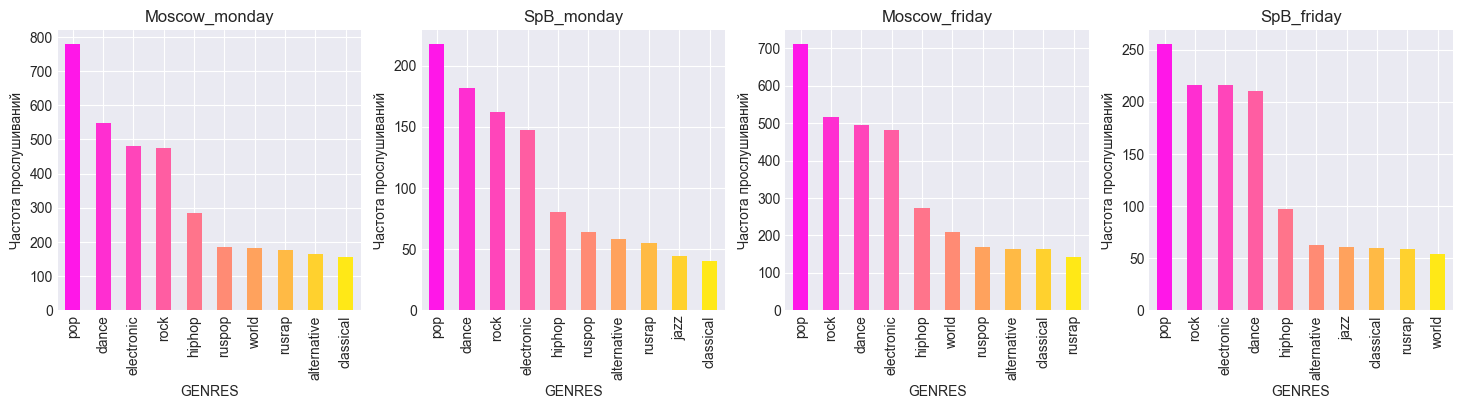

In [41]:
colors = sns.color_palette('spring', 10)
plt.figure(figsize= (18, 8))

ax = plt.subplot(241) # добавляем несколько графиков в один блок
m1.plot.bar(color= colors)
plt.xlabel('GENRES')
plt.ylabel('Частота прослушиваний')
plt.title("Moscow_monday")

ax = plt.subplot(242) # добавляем несколько графиков в один блок
m2.plot.bar(color= colors)
plt.xlabel('GENRES')
plt.ylabel('Частота прослушиваний')
plt.title("SpB_monday")

ax = plt.subplot(243) # добавляем несколько графиков в один блок
m3.plot.bar(color= colors)
plt.xlabel('GENRES')
plt.ylabel('Частота прослушиваний')
plt.title("Moscow_friday")

ax = plt.subplot(244) # добавляем несколько графиков в один блок
m4.plot.bar(color= colors)
plt.xlabel('GENRES')
plt.ylabel('Частота прослушиваний')
plt.title("SpB_friday")


plt.show()

**Выводы**

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное различие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз.
2. Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.
Разница между Москвой и Петербургом не слишком выражена, особенно в топ-5 жанров.

### Жанровые предпочтения в Москве и Петербурге

**Задание 26**

In [42]:
moscow_genres = moscow_general.groupby('genre') ['genre'].count()# одной строкой: группировка таблицы moscow_general по столбцу 'genre', выбор столбца `genre`, подсчёт числа значений 'genre' методом count(), сохранение в moscow_genres
moscow_genres = moscow_genres.sort_values(ascending=False)# сортировка получившегося Series в порядке убывания и сохранение обратно в moscow_genres

**Задание 27**

In [43]:
# просмотр первых 10 строк moscow_genres
print(moscow_genres.head(10))

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64


**Задание 28**

In [44]:
spb_genres = spb_general.groupby('genre') ['genre'].count()# одной строкой: группировка таблицы spb_general по столбцу 'genre', выбор столбца `genre`, подсчёт числа значений 'genre' методом count(), сохранение в spb_genres
spb_genres = spb_genres.sort_values(ascending=False) # сортировка получившегося Series в порядке убывания и сохранение обратно в spb_genres

**Задание 29**

In [45]:
# просмотр первых 10 строк spb_genres
print(spb_genres.head(10))

genre
pop            2431
dance          1932
rock           1879
electronic     1737
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64


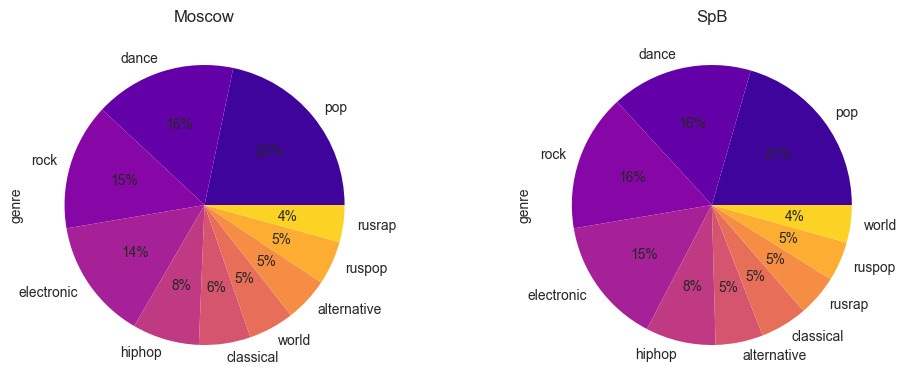

In [46]:
colors1 = sns.color_palette(palette='plasma', n_colors= 10) # задаем количество цветов, т.к. по умолчанию их 6, а у нас 10 значений
colors2 = sns.color_palette(palette='cool', n_colors= 10)
plt.figure(figsize= (12, 10))

ax = plt.subplot(221) # добавляем несколько графиков в один блок
plot = moscow_genres.head(10).plot.pie(colors= colors1, autopct='%.0f%%')
plt.title("Moscow")

ax = plt.subplot(222) # добавляем несколько графиков в один блок
plot = spb_genres.head(10).plot.pie(colors= colors1, autopct='%.0f%%')
plt.title("SpB")

plt.show()

**Выводы**

* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Рэп одинаково популярен в Москве и Петербурге.


## Итоги исследования

Вы проверили три гипотезы и установили:

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. 

3. Во вкусах пользователей Москвы и Петербурга больше общего, чем различий. 
Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.